<a href="https://colab.research.google.com/github/Ivano05/Practico-2022-/blob/main/IVANO_Examen_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![imagen.png](attachment:imagen.png)

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.





In [24]:
# Tratamiento de datos
import pandas as pd #Para leer y escribir datos en diferentes formatos
import numpy as np #Para manejar y generar datos


# Gráficos
import matplotlib.pyplot as plt #Pyplot funciones sencillas para añadir elementos a los ejes de un gráfico.
from matplotlib import style #Para hacer mas amigable los graficos
import seaborn as sns #Libreria basada en matplotlib para dibujar graficos estaticos

# Preprocesado y modelado
import tensorflow as tf 
import tensorflow_datasets as tfds


from scipy.stats import pearsonr #se usa para encontrar el coeficiente de correlación de Pearson, 
#que representa relaciones lineales entre dos variables. También da el valor p para probar la no correlación.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #Dividir arreglos o matrices en subconjuntos aleatorios de entrenamiento y prueba.

from sklearn.metrics import r2_score #Funcion que puntua la regresión 
from sklearn.metrics import mean_squared_error #función que calcula el error cuadrático medio , una métrica de riesgo correspondiente 
#al valor esperado del error o pérdida al cuadrado (cuadrático).
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# =============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [25]:
# Datos
# ==============================================================================
from sklearn.datasets import load_diabetes #utilizo un DS pre cargado de sklearn y elijo este porque es el que indica que es para regresion
data = load_diabetes() #guardo el dataset en data
#Convierto la data de Scikit-learn que baje en un Dataframe de pandas y para que me
data = pd.DataFrame(data= np.c_[data['target'], data['data']],
                     columns= ['target'] + data['feature_names'] )                                                                   
data['target'].unique()
#PONER CODIGO AQUI

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144., 168.,  68.,  49., 245.,
       184., 202., 137.,  85., 131., 283., 129.,  59., 341.,  87.,  65.,
       102., 265., 276., 252.,  90., 100.,  55.,  61.,  92., 259.,  53.,
       190., 142., 155., 225., 104., 182., 128.,  52.,  37., 170.,  71.,
       163., 150., 160., 178.,  48., 270., 111.,  42., 200., 113., 143.,
        51., 210., 134.,  98., 164.,  96., 162., 279.,  83., 302., 198.,
        95., 232.,  81., 246., 297., 258., 229., 275., 281., 173., 180.,
        84., 121., 161.,  99., 109., 115., 268., 274., 158., 107., 103.,
       272., 280., 336., 317., 235.,  60., 174., 126., 288.,  88., 292.,
       197., 186.,  25., 195., 217., 172., 214.,  70., 220., 152.,  47.,
        74., 295., 127., 237.,  64.,  79.,  91., 116.,  86., 122.,  72.,
        39., 196., 222., 277.,  77., 191.,  73., 263., 248., 296.,  78.,
        93., 208., 108., 154., 124.,  67., 257., 26

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [27]:
#Este es el codigo me permite generar una base de datos random

from sklearn.datasets import make_regression
n_samples,n_features = 1000, 5
rng = np.random.RandomState(0)
X,y = make_regression(n_samples, n_features, noise = 10, random_state=rng)

In [29]:
datos_creados = np.c_[X,y]
#datos = pd.DataFrame(datos_creados, columns = ['ventas', 'tv', 'radio', 'periodico', 'redes', 'grafica' ]) #son todas X menos la ultima posicion que Y
datos = pd.DataFrame(datos_creados, columns = ['tv', 'radio', 'periodico', 'redes', 'grafica', 'ventas'])

datos

,tv,radio,periodico,redes,grafica,ventas
0,-1.718650,0.969624,0.196770,0.143464,-1.056957,-18.793739
1,-0.998192,-1.004323,-0.766705,-1.067742,-1.373043,-209.202089
2,-1.652804,0.174680,-1.400256,0.063896,1.065927,-40.190887
3,-0.422315,0.892474,0.555963,0.228053,0.104714,51.843160
4,-1.023173,0.177158,0.976382,-0.911881,0.106720,-81.601143
...,...,...,...,...,...,...
995,-0.072073,1.665450,2.599867,0.862707,0.884115,219.933596
996,0.945539,0.182100,-0.526243,1.510525,-0.201385,128.914396
997,0.765002,0.030386,0.707135,-2.256250,0.867665,-77.709960
998,-0.704341,0.374948,-0.999278,-0.627299,1.074704,-12.600054


In [ ]:
datos = data

In [30]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
31,ventas,radio,0.613060,0.613060
11,radio,ventas,0.613060,0.613060
33,ventas,redes,0.605504,0.605504
23,redes,ventas,0.605504,0.605504
5,tv,ventas,0.375828,0.375828
30,ventas,tv,0.375828,0.375828
34,ventas,grafica,0.288919,0.288919
29,grafica,ventas,0.288919,0.288919
17,periodico,ventas,0.127158,0.127158
32,ventas,periodico,0.127158,0.127158


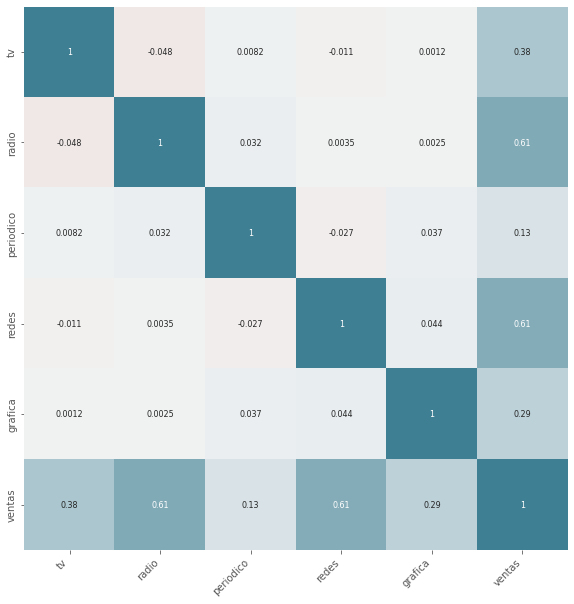

In [31]:
# Heatmap matriz de correlaciones
# ==============================================================================

#Función para convertir una matriz de correlación de pandas en formato tidy
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

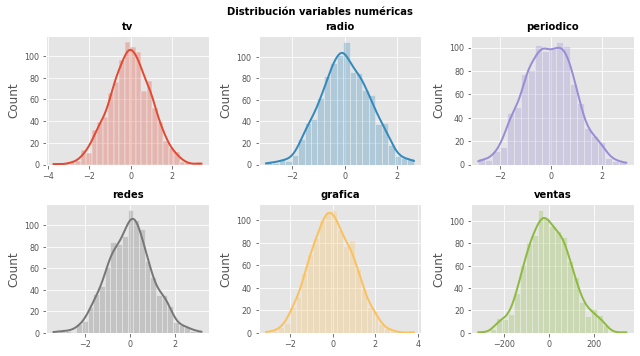

In [32]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

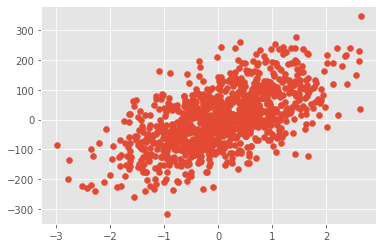

In [22]:
plt.scatter(datos['radio'],datos['ventas'])

In [33]:
# División de los datos en train y test
# ==============================================================================
X = datos[['tv', 'radio', 'periodico', 'redes', 'grafica']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size = 0.8,
                                        random_state = 1234,
                                        shuffle = True
)
#PONER CODIGO AQUI

# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(
#                     np.hstack((X_train, y_train)),
#                     columns=[]
#               )
# modelo = smf.ols(formula = 'ventas ~ tv + radio + periodico', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo =sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())





                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.630e+04
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:04:34   Log-Likelihood:                -2965.2
No. Observations:                 800   AIC:                             5942.
Df Residuals:                     794   BIC:                             5971.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2780      0.351      0.792      0.4

El R-Squared indica que porcentaje es capaz de explicar de la variabilidad de la variable objetivo obserbada. Ej: Si el R-squared es de 0.990 nos dice que el model explica el 99.0 de la variabilidad observada en las ventas.



In [34]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train



Curtosis: una curtosis grande implica una mayor concentración de valores de la variable tanto muy cerca de la media de la distribución (pico) como muy lejos de ella (colas), al tiempo que existe una relativamente menor frecuencia de valores intermedios. Esto explica una forma de la distribución de frecuencias/probabilidad con colas más gruesas, con un centro más apuntado y una menor proporción de valores intermedios entre el pico y colas.



IndexError: ignored

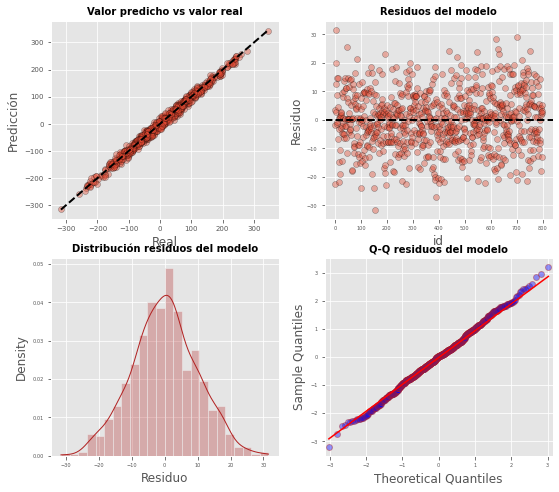

In [38]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 5)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 5)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 5)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 5)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");